# Import Libraries

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Read Dataset

In [23]:
df = pd.read_csv("titanic.csv")

# Feature Engineering

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
df['Ticket'].head()

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450


In [29]:
features = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked' ]].copy()
target = df['Survived'].copy()

In [30]:
features.isna().sum()

features['Sex'] = LabelEncoder().fit_transform(features['Sex'])

features['Embarked'] = features['Embarked'].fillna(features['Embarked'].mode()[0])

features.isna().sum()

features.groupby('Pclass')['Age'].median()

features['Age'] = features.groupby('Pclass')['Age'].transform(lambda x:x.fillna(x.median()))

features.isna().sum()

features['Embarked'].unique()

features = pd.get_dummies(features, columns=['Embarked'])

features.dtypes

,0
Pclass,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Sex,int64
Embarked_C,bool
Embarked_Q,bool
Embarked_S,bool


# Train Test Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=23)

# EDA

In [ ]:
features_with_target = features.copy()
features_with_target['Survived'] = target

plt.figure(figsize=(10,6))
sns.heatmap(features_with_target.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Survived")
plt.show()

sns.countplot(x=target, palette="Greens")
plt.title("Survival Count")
plt.show()

sns.histplot(features['Age'], bins=50, kde=True)
plt.title("Age Distribution")
plt.show()

sns.barplot(x=df['Pclass'], y=target, ci=None, palette="Greens")
plt.title("Survival Rate by Passenger Class")
plt.show()

# Model Training

In [39]:
grid = {
    'max_depth' : [3,5,7,10],
    'min_samples_split' : [2,5,10,15],
    'min_samples_leaf' : [1,2,5],
    'criterion' : ['gini','entropy']
}

dt = DecisionTreeClassifier(random_state=23)

grid_s = GridSearchCV(dt, grid, cv = 5, scoring = 'accuracy')

grid_s.fit(x_train, y_train)

preds = grid_s.predict(x_test)

# Model Evaluation

In [47]:
print("Accuracy:", accuracy_score(y_test, preds)*100)
print("\nClassification Report:")
print(classification_report(y_test, preds))

Accuracy: 79.88826815642457

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       115
           1       0.75      0.66      0.70        64

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.80      0.80      0.80       179



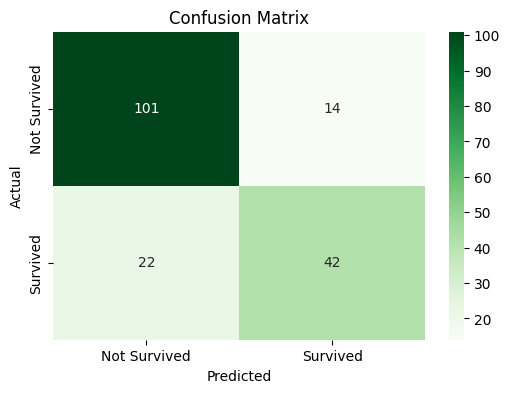

In [50]:
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()